In [ ]:
""""Theoretical Questions
1.What is Boosting in Machine Learning?
Boosting is an ensemble technique that combines multiple weak learners (typically decision trees) to form a strong learner. It works by sequentially training models, with each new model focusing on correcting the errors made by previous ones.

2.How does Boosting differ from Bagging?

Bagging (Bootstrap Aggregating): Trains models independently in parallel and then aggregates the results (e.g., Random Forest).

Boosting: Trains models sequentially, with each model focusing on the errors of the previous one.

3.What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) assigns weights to data points. Misclassified points receive higher weights so that subsequent learners focus more on them.

4.Explain the working of AdaBoost with an example:
Start with equal weights for all data points. Train a weak learner. Increase weights of misclassified points. Train next learner on the re-weighted data. Repeat for several rounds. Final prediction is a weighted majority vote of all learners.

5.What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting optimizes a loss function using gradient descent. Instead of adjusting data weights (like AdaBoost), it fits the next learner to the residual errors of the previous one.

6.What is the loss function in Gradient Boosting?
Common loss functions include Mean Squared Error (MSE) for regression and Log Loss for classification.

7.How does XGBoost improve over traditional Gradient Boosting?

Regularization (L1/L2) to reduce overfitting.

Parallel computation.

Handling missing values.

Tree pruning (depth-wise).

Efficient handling of sparse data.

8.What is the difference between XGBoost and CatBoost?

XGBoost: Great performance, handles missing values.

CatBoost: Optimized for categorical data, minimal preprocessing needed, uses ordered boosting.

9.What are some real-world applications of Boosting techniques?

Credit scoring

Fraud detection

Recommender systems

Medical diagnosis

Customer churn prediction

10.How does regularization help in XGBoost?
It penalizes model complexity (number/weight of trees), reducing overfitting and improving generalization.

11.What are some hyperparameters to tune in Gradient Boosting models?

Learning rate

Number of estimators

Max depth

Subsample

Min samples split

Loss function

12.What is the concept of Feature Importance in Boosting?
It measures the contribution of each feature to the model’s prediction, often based on how frequently and how effectively a feature is used for splitting in trees.

13.Why is CatBoost efficient for categorical data?
It natively supports categorical features, using techniques like target encoding and ordered boosting to avoid overfitting and data leakage.

""""

AdaBoost Classifier Accuracy: 0.9333333333333333
AdaBoost Regressor MAE: 0.713504147823346
Top Gradient Boosting Features:
 mean concave points     0.448766
worst concave points    0.240294
worst radius            0.075374
worst perimeter         0.050911
worst texture           0.044322
dtype: float64
Gradient Boosting Regressor R^2 Score: 0.7755824521517651
XGBoost Classifier Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:07:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.956140350877193
CatBoost F1 Score: 0.9790209790209791
XGBoost Regressor MSE: 0.2225899267544737


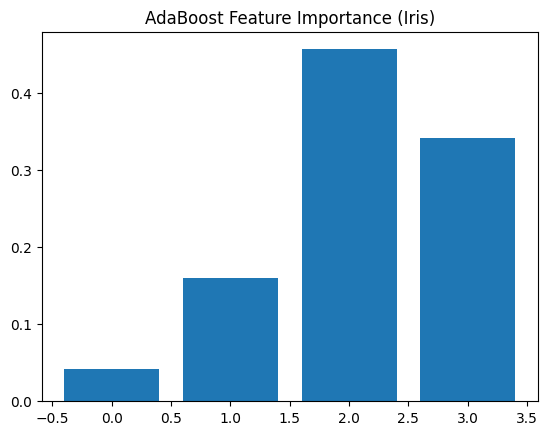

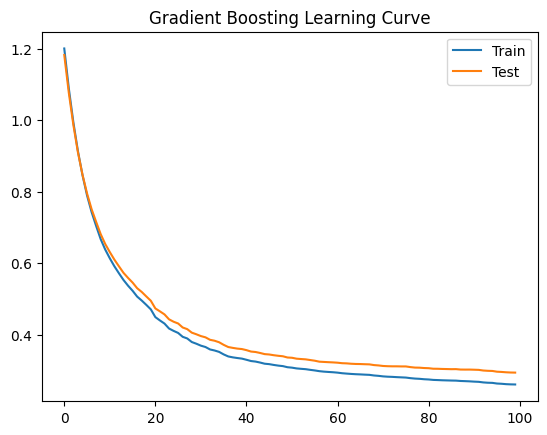

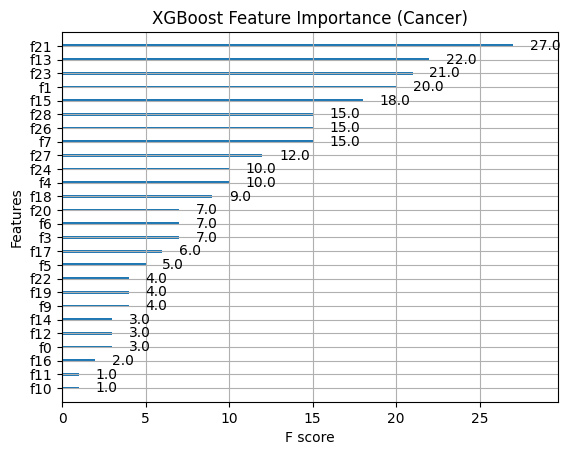

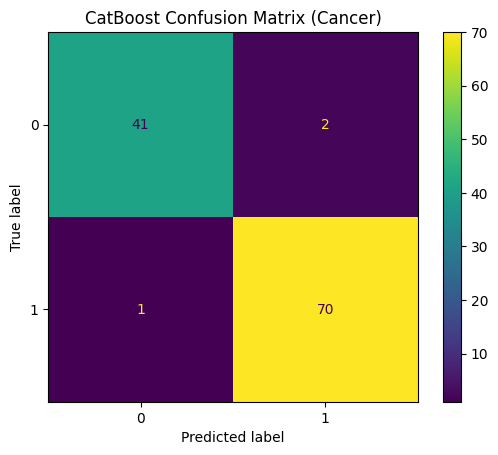

AdaBoost with 10 estimators Accuracy (Iris): 1.0
AdaBoost with 50 estimators Accuracy (Iris): 0.9333333333333333
AdaBoost with 100 estimators Accuracy (Iris): 0.9333333333333333
AdaBoost with 200 estimators Accuracy (Iris): 0.9333333333333333


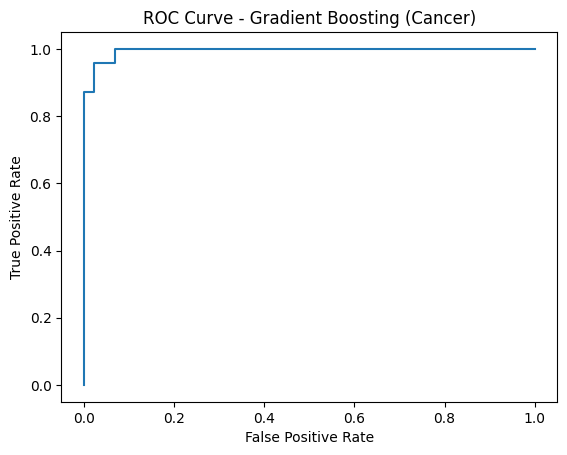

Best Learning Rate (XGBoost Regressor - Housing): {'learning_rate': 0.2}
CatBoost F1 (Balanced on Imbalanced Data): 0.9951690821256038
AdaBoost with learning rate 0.01 (Iris): Accuracy = 0.6333333333333333
AdaBoost with learning rate 0.1 (Iris): Accuracy = 1.0
AdaBoost with learning rate 1.0 (Iris): Accuracy = 0.9333333333333333
XGBoost Multiclass Log-Loss (Iris Test Set): 0.009289027880442384


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [10]:
!pip install catboost
from pathlib import Path

# Create the full Python script content for the practical assignment
#practical_code =
# Boosting Techniques Practical Assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error, f1_score, roc_curve, auc, confusion_matrix, log_loss
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from catboost import CatBoostClassifier, CatBoostRegressor, Pool # catboost will now be available

# Load datasets
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

# Task 1: AdaBoost Classifier
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=50)
ada_clf.fit(X_train, y_train)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, ada_clf.predict(X_test)))

# Task 2: AdaBoost Regressor
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
ada_reg = AdaBoostRegressor(n_estimators=50)
ada_reg.fit(X_train, y_train)
print("AdaBoost Regressor MAE:", mean_absolute_error(y_test, ada_reg.predict(X_test)))

# Task 3: Gradient Boosting Classifier
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
importances = pd.Series(gb_clf.feature_importances_, index=cancer.feature_names)
print("Top Gradient Boosting Features:\n", importances.sort_values(ascending=False).head())

# Task 4: Gradient Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
print("Gradient Boosting Regressor R^2 Score:", r2_score(y_test, gb_reg.predict(X_test)))

# Task 5: XGBoost Classifier vs GB
# Re-split data for Task 5 using cancer dataset as per Task 3
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_clf.fit(X_train, y_train)
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, xgb_clf.predict(X_test)))
# Re-fit GB Classifier on cancer data for comparison
gb_clf_compare = GradientBoostingClassifier()
gb_clf_compare.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_clf_compare.predict(X_test)))

# Task 6: CatBoost Classifier F1 Score
# Re-split data for Task 6 using cancer dataset as per Task 3
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
cat_clf = CatBoostClassifier(verbose=0)
cat_clf.fit(X_train, y_train)
print("CatBoost F1 Score:", f1_score(y_test, cat_clf.predict(X_test))) # f1_score doesn't need rounding for binary classification

# Task 7: XGBoost Regressor MSE
# Re-split data for Task 7 using housing dataset as per Task 2
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
print("XGBoost Regressor MSE:", mean_squared_error(y_test, xgb_reg.predict(X_test)))

# Task 8: AdaBoost Feature Importance
# Ensure the correct AdaBoost model trained on Iris data is used
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
ada_clf_iris = AdaBoostClassifier(n_estimators=50)
ada_clf_iris.fit(X_train_iris, y_train_iris)
plt.bar(range(X_iris.shape[1]), ada_clf_iris.feature_importances_)
plt.title("AdaBoost Feature Importance (Iris)")
plt.show()

# Task 9: GB Regressor Learning Curve
# Use housing dataset for regression learning curve
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
train_errors, test_errors = [], []
for m in range(1, 101):
    gb = GradientBoostingRegressor(n_estimators=m)
    gb.fit(X_train_housing, y_train_housing)
    train_errors.append(mean_squared_error(y_train_housing, gb.predict(X_train_housing)))
    test_errors.append(mean_squared_error(y_test_housing, gb.predict(X_test_housing)))
plt.plot(train_errors, label="Train")
plt.plot(test_errors, label="Test")
plt.legend()
plt.title("Gradient Boosting Learning Curve")
plt.show()

# Task 10: XGBoost Feature Importance
# Use the XGBoost classifier trained on cancer data from Task 5
plot_importance(xgb_clf)
plt.title("XGBoost Feature Importance (Cancer)")
plt.show()

# Task 11: CatBoost Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Use the CatBoost classifier trained on cancer data from Task 6
# Ensure we use the X_test and y_test corresponding to the cancer dataset used in Task 6
# Re-split the cancer data to ensure we have the correct test set for this task
X_train_cancer_task11, X_test_cancer_task11, y_train_cancer_task11, y_test_cancer_task11 = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# We need to generate predictions using the cat_clf model on the correct test set
cat_clf_predictions_task11 = cat_clf.predict(X_test_cancer_task11)

ConfusionMatrixDisplay.from_predictions(y_test_cancer_task11, cat_clf_predictions_task11)
plt.title("CatBoost Confusion Matrix (Cancer)")
plt.show()

# Task 12: AdaBoost with different estimators
# Use Iris dataset for classification
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train_iris, y_train_iris)
    print(f"AdaBoost with {n} estimators Accuracy (Iris):", accuracy_score(y_test_iris, model.predict(X_test_iris)))

# Task 13: GB ROC Curve
# Use Gradient Boosting Classifier on Cancer data (binary classification required for standard ROC)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
gb_clf_roc = GradientBoostingClassifier()
gb_clf_roc.fit(X_train_cancer, y_train_cancer)
probs = gb_clf_roc.predict_proba(X_test_cancer)[:,1]
fpr, tpr, _ = roc_curve(y_test_cancer, probs)
plt.plot(fpr, tpr)
plt.title("ROC Curve - Gradient Boosting (Cancer)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Task 14: XGBoost GridSearch for learning rate
# Use Housing dataset for regression GridSearch
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
params = {'learning_rate': [0.01, 0.1, 0.2]}
grid = GridSearchCV(XGBRegressor(), param_grid=params, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train_housing, y_train_housing)
print("Best Learning Rate (XGBoost Regressor - Housing):", grid.best_params_)

# Task 15: CatBoost on Imbalanced Data
from sklearn.datasets import make_classification
X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], n_features=10, random_state=42)
cat_bal = CatBoostClassifier(auto_class_weights='Balanced', verbose=0)
cat_bal.fit(X_imb, y_imb)
print("CatBoost F1 (Balanced on Imbalanced Data):", f1_score(y_imb, cat_bal.predict(X_imb)))

# Task 16: AdaBoost with varying learning rates
# Use Iris dataset for classification
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
for lr in [0.01, 0.1, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train_iris, y_train_iris)
    print(f"AdaBoost with learning rate {lr} (Iris): Accuracy =", accuracy_score(y_test_iris, model.predict(X_test_iris)))

# Task 17: XGBoost Multi-class with log-loss
# Use Iris dataset for multi-class classification
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
xgb_multi = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_multi.fit(X_train_iris, y_train_iris)
probs = xgb_multi.predict_proba(X_test_iris)
print("XGBoost Multiclass Log-Loss (Iris Test Set):", log_loss(y_test_iris, probs))
